In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/imdwipayana/Final-Project/main/House%20Prices/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/imdwipayana/Final-Project/main/House%20Prices/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

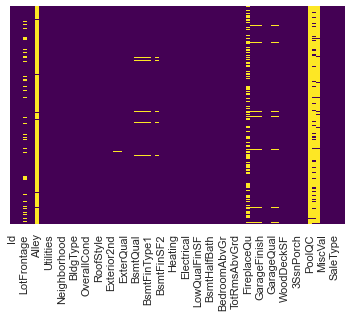

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
train['BedroomAbvGr'].describe()

count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64

In [9]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
new_train = train[['BsmtFinSF1','BedroomAbvGr','LotArea','YearBuilt','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
                   'SalePrice']]
new_train.head()

,BsmtFinSF1,BedroomAbvGr,LotArea,YearBuilt,OverallQual,OverallCond,YearBuilt,YearRemodAdd,SalePrice
0,706,3,8450,2003,7,5,2003,2003,208500
1,978,3,9600,1976,6,8,1976,1976,181500
2,486,3,11250,2001,7,5,2001,2002,223500
3,216,3,9550,1915,7,5,1915,1970,140000
4,655,4,14260,2000,8,5,2000,2000,250000


In [11]:
new_train['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

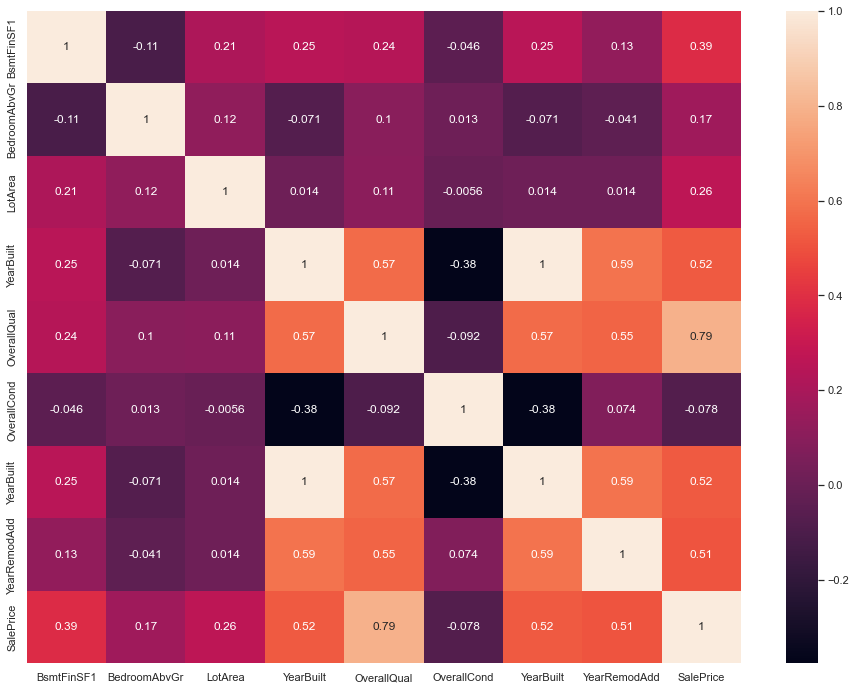

In [12]:
plot = new_train.copy()
#Correlation heatmap
sns.set(rc={'figure.figsize':(16,12)})
sns.heatmap(plot.corr(),annot=True)
plt.show()

In [13]:
new2_train =train[['HalfBath','FullBath','BsmtHalfBath','BsmtFullBath','GrLivArea','LowQualFinSF','TotalBsmtSF','2ndFlrSF',
                   '1stFlrSF','BsmtUnfSF','BsmtFinSF2','SalePrice']]

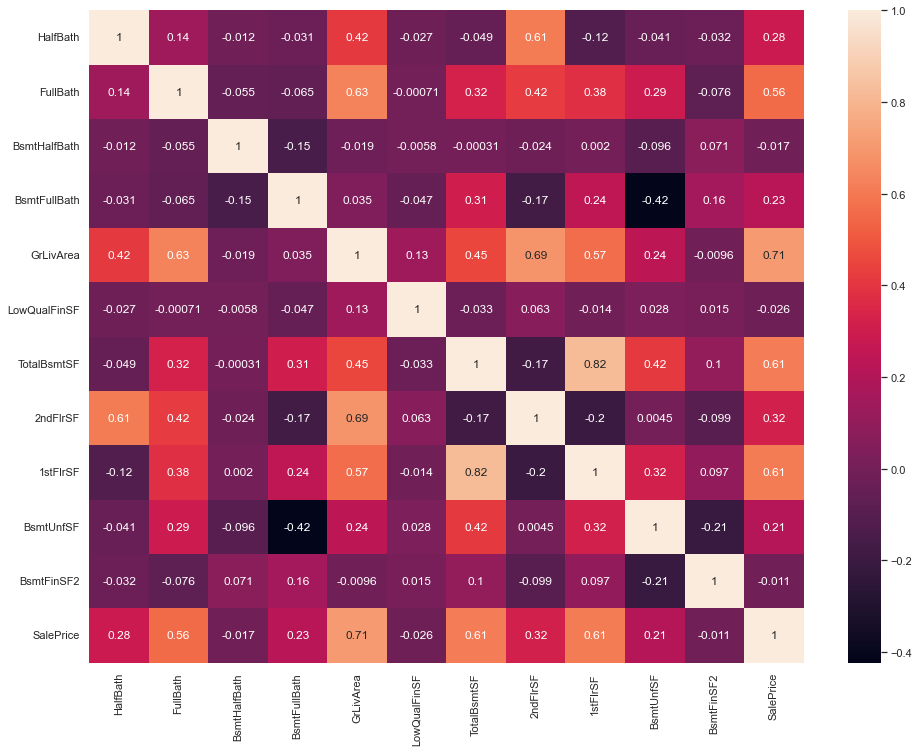

In [14]:
plot2 = new2_train.copy()
#Correlation heatmap
sns.set(rc={'figure.figsize':(16,12)})
sns.heatmap(plot2.corr(),annot=True)
plt.show()

In [15]:
new3_train = train[['GarageArea','GarageCars','Fireplaces','TotRmsAbvGrd','KitchenAbvGr','BedroomAbvGr','SalePrice']]

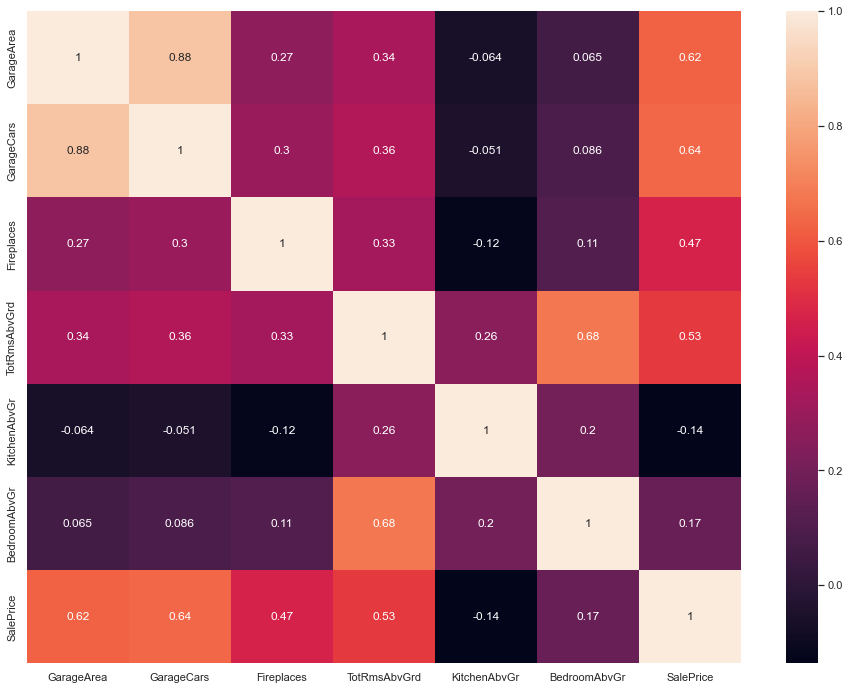

In [16]:
plot3 = new3_train.copy()
#Correlation heatmap
sns.set(rc={'figure.figsize':(16,12)})
sns.heatmap(plot3.corr(),annot=True)
plt.show()

In [17]:
new4_train = train[['YrSold','MoSold','MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','OpenPorchSF',
                    'WoodDeckSF','SalePrice']]

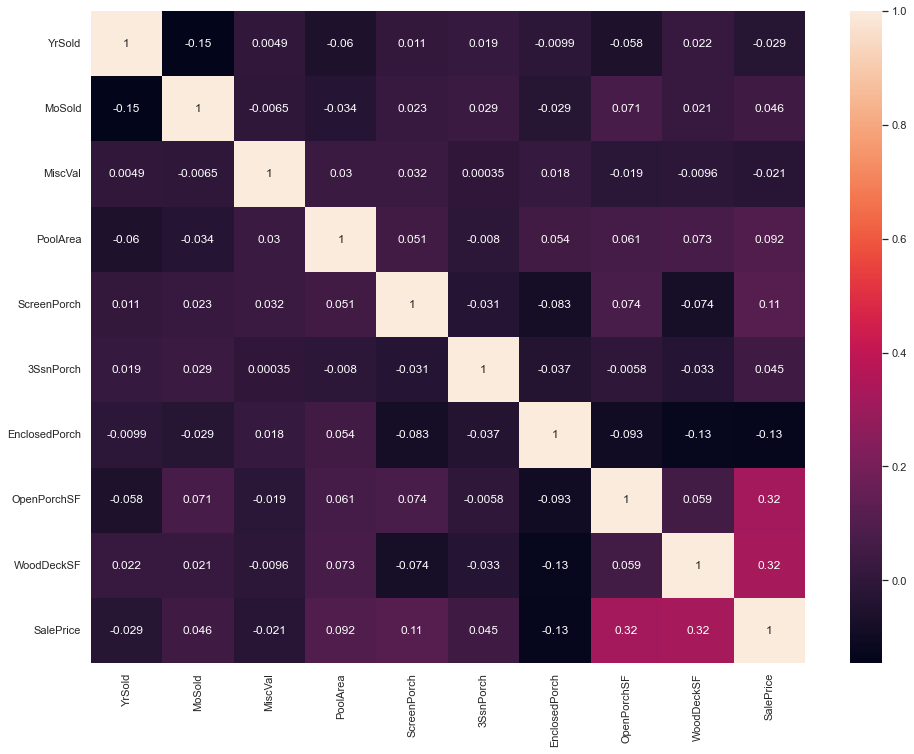

In [18]:
plot4 = new4_train.copy()
#Correlation heatmap
sns.set(rc={'figure.figsize':(16,12)})
sns.heatmap(plot4.corr(),annot=True)
plt.show()

In [19]:
all_new_train = train[['BsmtFinSF1','BedroomAbvGr','LotArea','YearBuilt','OverallQual','OverallCond','YearBuilt',
                       'YearRemodAdd','HalfBath','FullBath','BsmtHalfBath','BsmtFullBath','GrLivArea','LowQualFinSF',
                       'TotalBsmtSF','2ndFlrSF','1stFlrSF','BsmtUnfSF','BsmtFinSF2','GarageArea','GarageCars',
                       'Fireplaces','TotRmsAbvGrd','KitchenAbvGr','BedroomAbvGr','YrSold','MoSold','MiscVal','PoolArea',
                       'ScreenPorch','3SsnPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF']]

In [20]:
all_new_train.head()

,BsmtFinSF1,BedroomAbvGr,LotArea,YearBuilt,OverallQual,OverallCond,YearBuilt,YearRemodAdd,HalfBath,FullBath,...,BedroomAbvGr,YrSold,MoSold,MiscVal,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF
0,706,3,8450,2003,7,5,2003,2003,1,2,...,3,2008,2,0,0,0,0,0,61,0
1,978,3,9600,1976,6,8,1976,1976,0,2,...,3,2007,5,0,0,0,0,0,0,298
2,486,3,11250,2001,7,5,2001,2002,1,2,...,3,2008,9,0,0,0,0,0,42,0
3,216,3,9550,1915,7,5,1915,1970,0,1,...,3,2006,2,0,0,0,0,272,35,0
4,655,4,14260,2000,8,5,2000,2000,1,2,...,4,2008,12,0,0,0,0,0,84,192


In [21]:
all_new_train.shape

(1460, 34)

In [22]:
all_new_train.isnull().sum()

BsmtFinSF1       0
BedroomAbvGr     0
LotArea          0
YearBuilt        0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
TotalBsmtSF      0
2ndFlrSF         0
1stFlrSF         0
BsmtUnfSF        0
BsmtFinSF2       0
GarageArea       0
GarageCars       0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
dtype: int64

In [23]:
from sklearn.manifold import TSNE
sns.set(rc={'figure.figsize':(12,8)})
#palette = sns.color_palette("bright", 34)

In [24]:
X_tsne = TSNE().fit_transform(all_new_train)

C:\Users\ekadw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

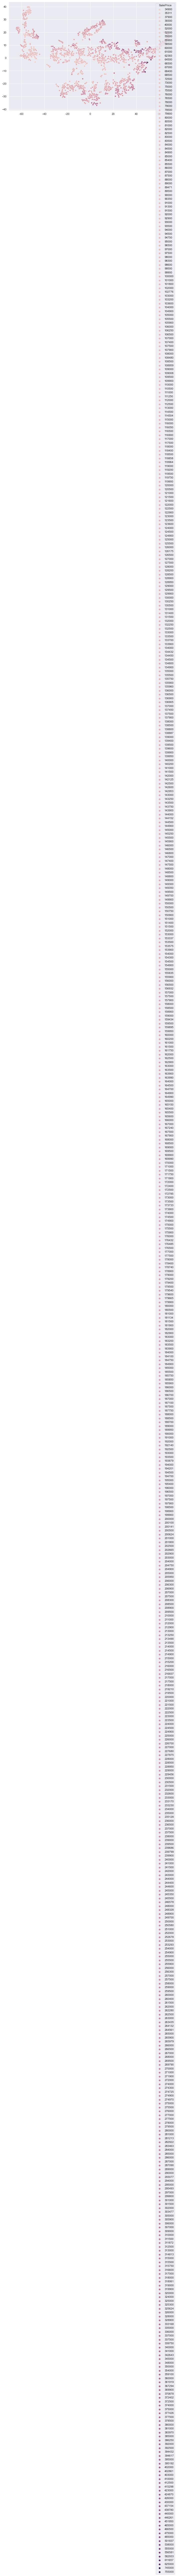

In [25]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=new_train['SalePrice'],legend = 'full')

In [26]:
test.shape

(1459, 80)

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC